<img src="fireblaze.jpg" width=250 height=200 />

## <p style="font-family: Arial; font-size:1.4em;color:red; style='background :yellow'"> Assignment</p>


<span style='color:Red'> **About The Dataset** </span>

**Each row represents a customer, each column contains customer’s attributes described on the column Metadata.**

* **Customers who left within the last month** – the column is called Churn.

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [3]:
# !pip install graphviz

<span style='color:Blue'> **Import the Required Libraries** </span>

In [4]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

<span style='color:Blue'> **Question - 1. Review the data sets and view the first Ten lines.** </span>

In [5]:
df = pd.read_csv('telecom_churn.csv')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<span style='color:Blue'> **Question - 2. Are there any null values in the data?** </span>

In [7]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<span style='color:Blue'> **Question - 3. How many categorical columns are there and what are they?** </span>

In [8]:
df.select_dtypes(include=['object'])

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
3328,AZ,No,Yes
3329,WV,No,No
3330,RI,No,No
3331,CT,Yes,No


<span style='color:Blue'> **Question - 4. Which column has two classes?** </span>

NOTE:- Also called as boolean column.

In [9]:
df.select_dtypes(include=['bool'])

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


<span style='color:Blue'> **Question - 5. Are there any repeated values?** </span>

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

<span style='color:Blue'> **Question - 6. What is the unique count of values in each column?** </span>

In [12]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

<span style='color:Blue'> **Question - 7. What is the percentage of International plan users?** </span>

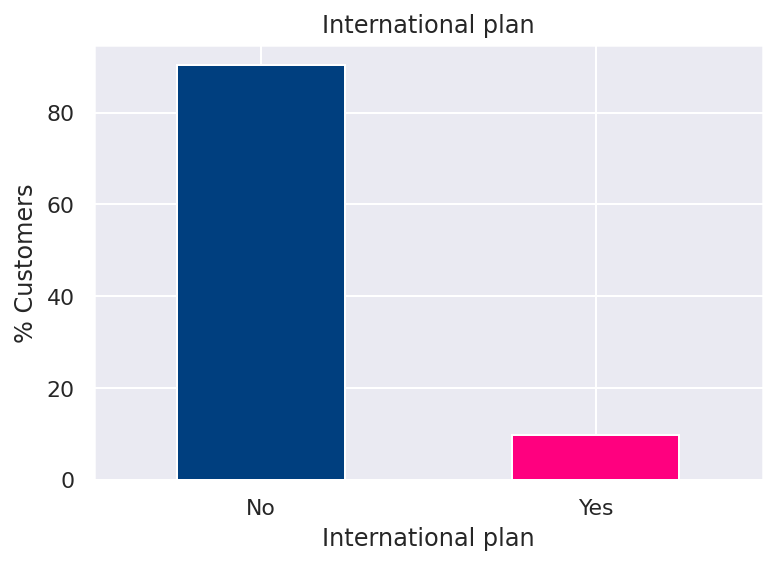

In [13]:
colors = ['#003f7f','#ff007f']
ax = (df['International plan'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                   stacked = True,rot = 0,color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('International plan')
ax.set_ylabel('% Customers')
ax.set_title('International plan')
plt.show()

<span style='color:Blue'> **Question - 8. Convert categorical features into numerical.** </span>

In [14]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']

In [15]:
y = df['Churn']
df.drop(['State'], axis=1, inplace=True)

In [16]:
states

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

# 2. Exploratory Data Analysis

<span style='color:Blue'> **Question - 9. Check for imbalance class distribution.** </span>

In [17]:
# Class Distribution
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<span style='color:Blue'> **Question - 10. Visualize the target feature.** </span>

HINT:- Used bar plot.

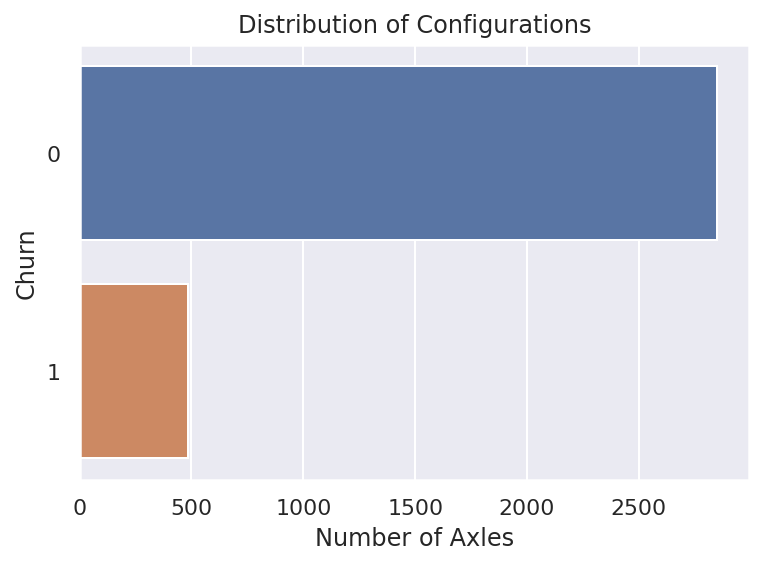

In [18]:
ax = sns.countplot(y='Churn', data=df)
plt.title('Distribution of Configurations')
plt.xlabel('Number of Axles')
plt.show()

<span style='color:Blue'> **Question - 11. Visualize the remaining categorical features.** </span>

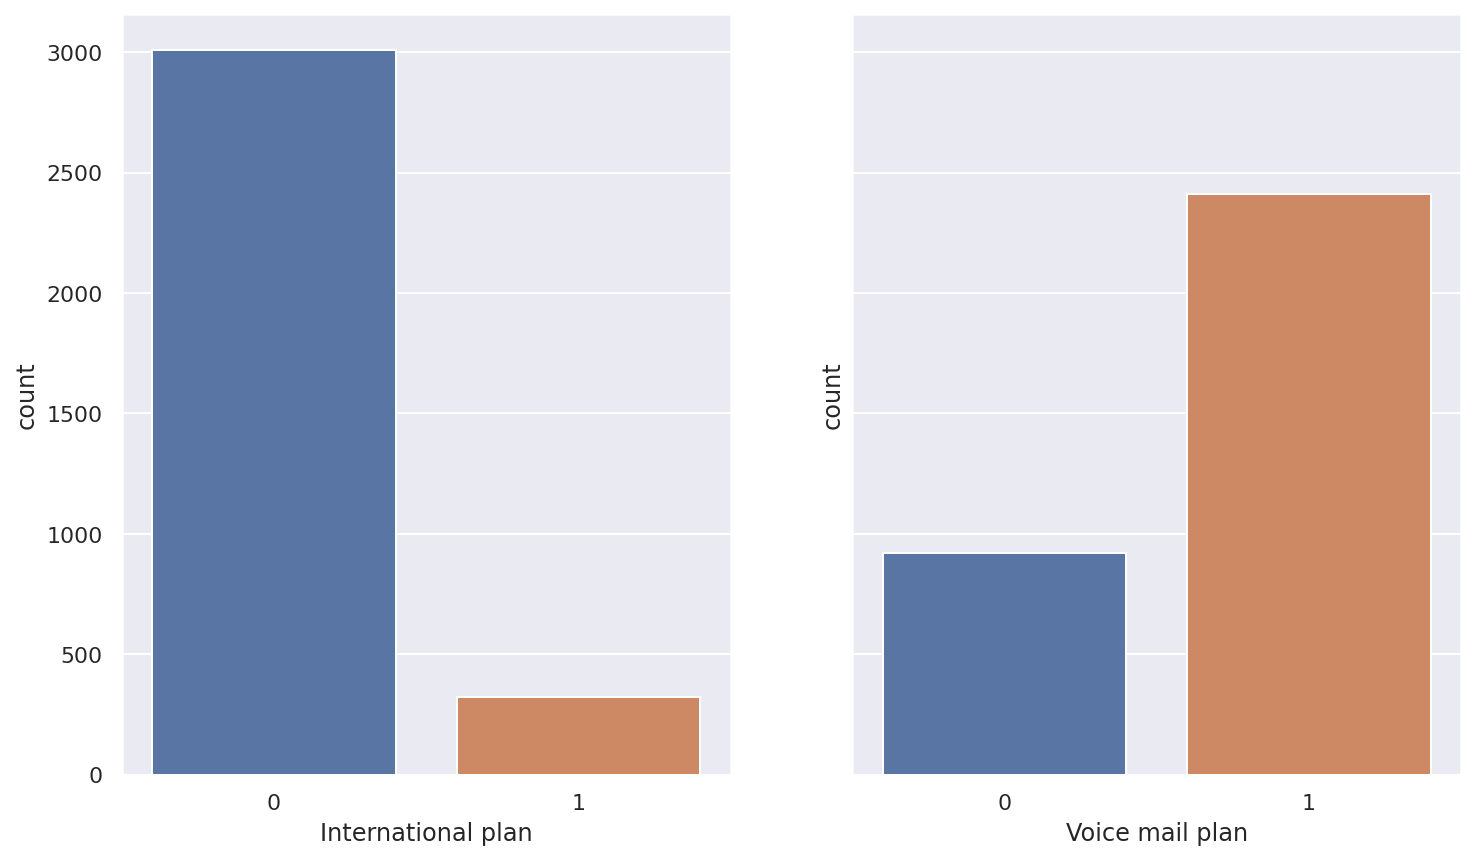

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)
sns.countplot("International plan", data=df, ax=axes[0])
sns.countplot("Voice mail plan", data=df, ax=axes[1])
plt.show()

<span style='color:Blue'> **Question - 12. Count the churn with in international plan.** </span>

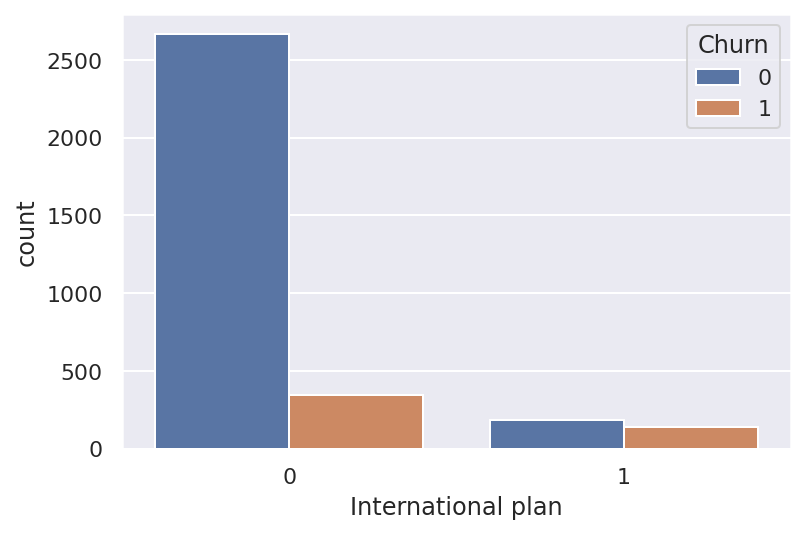

In [20]:
sns.countplot("International plan",hue='Churn', data=df)
plt.show()

<span style='color:Blue'> **Question - 13. Is there any effect in day calls while increasing the day charge?** </span>

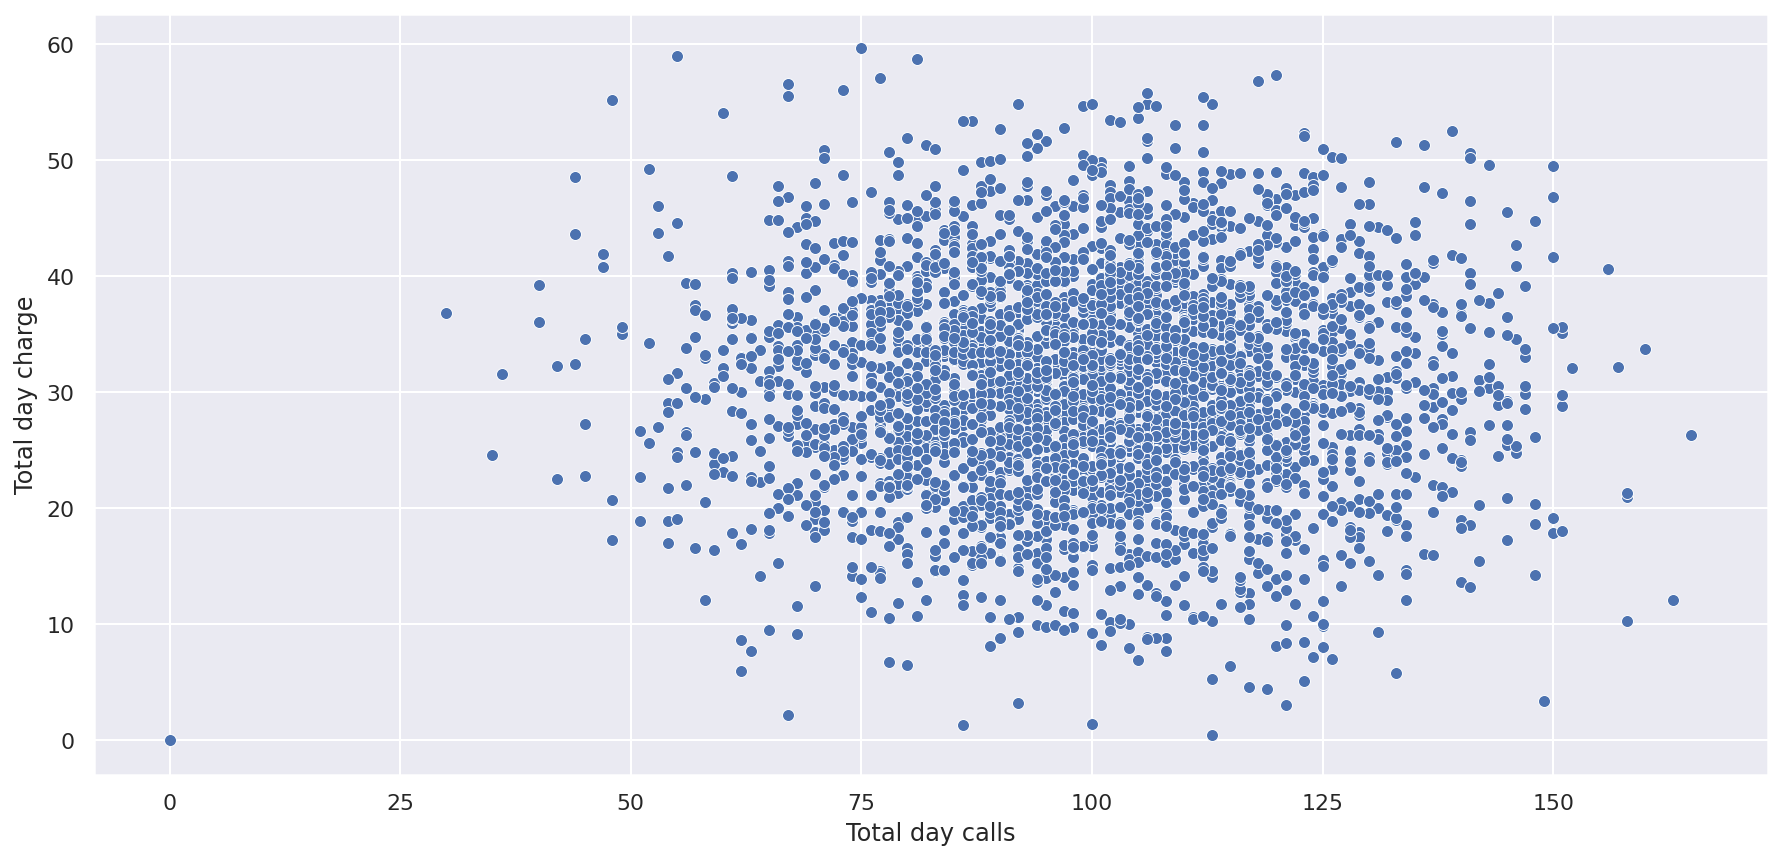

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'Total day calls',y='Total day charge',data=df)
plt.show()

<span style='color:Blue'> **Question - 14. Find out corrleation between features and mentioned it best features.** </span>


In [22]:
df_corr = df.apply(lambda x: pd.factorize(x)[0])

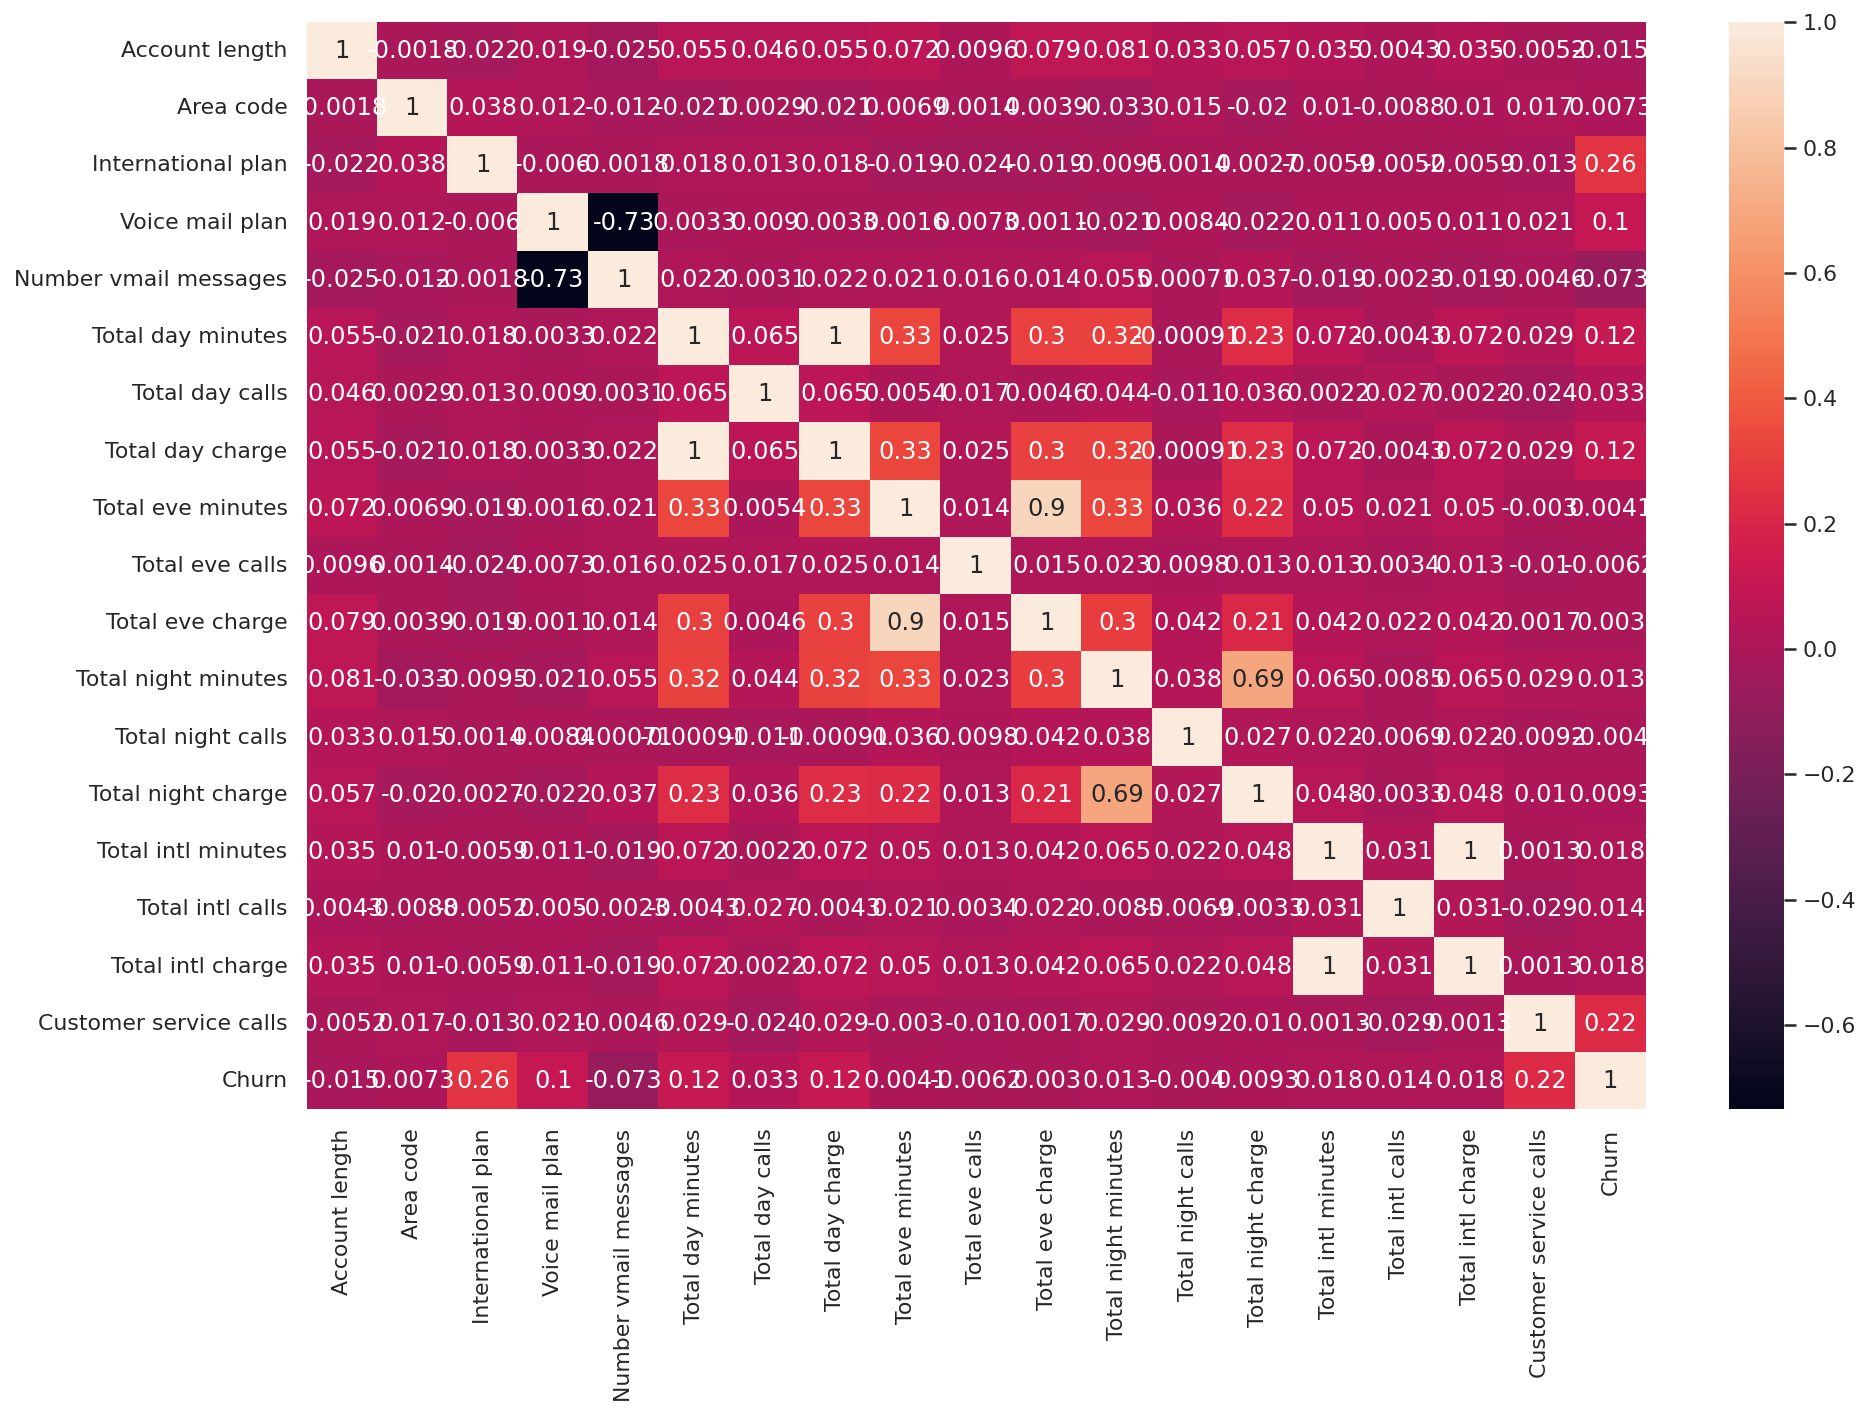

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

<span style='color:Blue'> **Question - 15. Split the dataset with 30% and apply the classification model** </span>


In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

<span style='color:Blue'> **Question - 16. How can you tell us your model is perfect for testing the dataset?** </span>


In [27]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

1.0

<span style='color:Blue'> **Question - 17. How many False and True examples(i.e. in percentage format) in our dataset after training?** </span>

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_holdout, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       867
           1       1.00      1.00      1.00       133

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



<span style='color:Blue'> **Question - 18. Apply the classification model on important features.** </span>


In [30]:
# !pip install pydotplus

In [31]:
# !sudo apt install graphviz

In [33]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [35]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns,
                 png_file_to_save='topic3_decision_tree4.png')

<span style='color:Blue'> **Question - 19. How many 'True Positive' and 'True Negative' values in confusion matrix.** </span>


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_holdout, tree_pred)

array([[867,   0],
       [  0, 133]])

<span style='color:Blue'> **Question - 20. Calculate the AUC score and visualize them?** </span>


In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [39]:
auc = roc_auc_score(y_holdout, tree_pred)
auc

1.0

In [40]:
ftr, tpr, thresholds = roc_curve(y_holdout, tree_pred)

Text(0.5, 1.0, 'ROC, auc: 1.0')

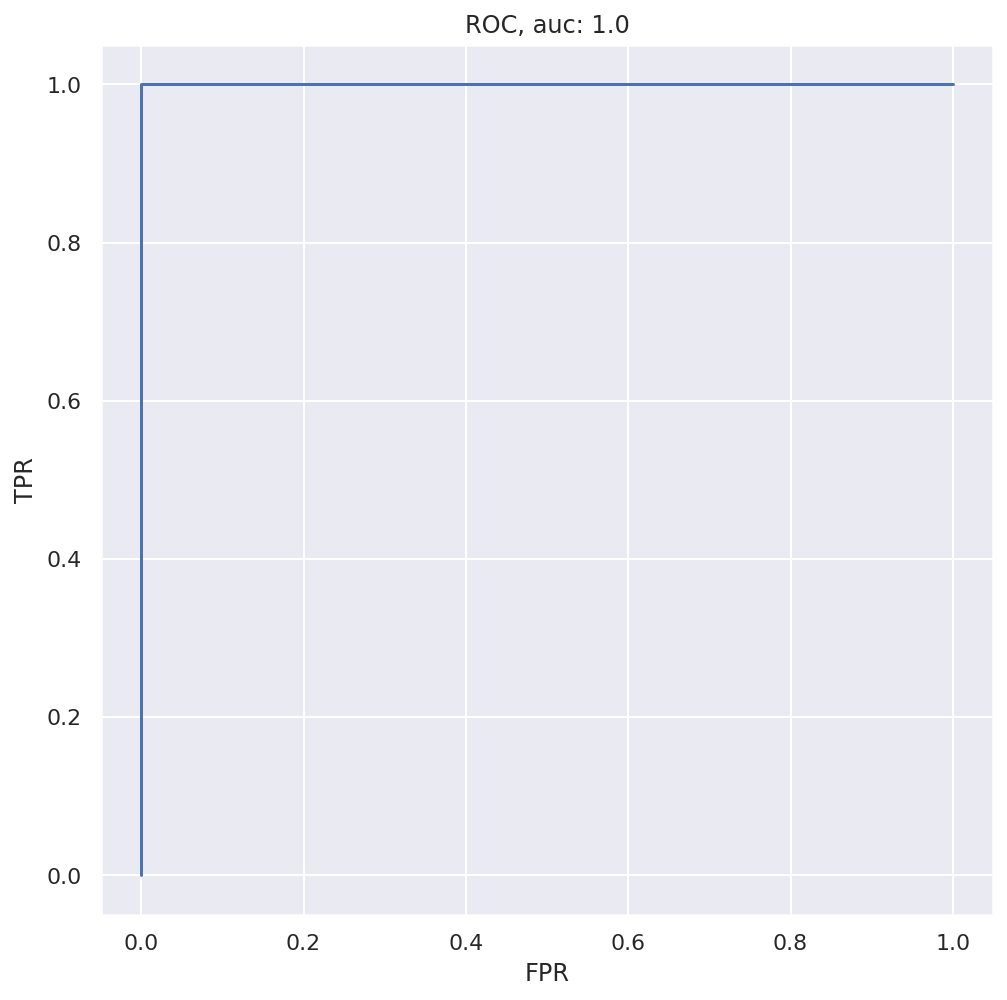

In [41]:
plt.rcParams['figure.figsize'] = 8,8
plt.plot(ftr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str(auc))